In [2]:
import shutup; shutup.please()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
import os
import missingno as msno
from pandas.plotting import table
from matplotlib.pyplot import figure
import re
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report,accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dhruv\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dhruv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dhruv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
df.shape

(50000, 2)

In [6]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [7]:
df1=df.sample(10000)

In [8]:
df1

,review,sentiment
10835,i really did not watch this show as often when...,positive
45390,>>>>Author: msgreen-1 from Canada >>>>The big ...,positive
49338,What's to like about this movie???<br /><br />...,negative
21101,The opening scenes move as fluidly as frozen v...,negative
46652,Anastasia: The Mystery of Anna was a two-part ...,positive
...,...,...
32771,Black and White film. Good photography. Believ...,negative
222,Howard (Kevin Kline) teaches English at the hi...,positive
12102,"This was a romantic, simple funny movie. I rea...",positive
12890,This movie is so daring it doesn't attempt to ...,negative


In [9]:
df1.shape

(10000, 2)

In [10]:
dups_review = df1.pivot_table(columns=['review'], aggfunc='size')
print (dups_review)

review
!!! Spoiler alert!!!<br /><br />The point is, though, that I didn't think this film had an ending TO spoil... I only started watching it in the middle, after Matt had gotten into Sarah's body, but then I became fascinated by the bizarreness of the plot, even for a Channel 5 movie... and couldn't possibly see how Matt wld end up happy. What about his fiancee? At one stage looked like he was gonna get with his best friend, surely icky and wrong... and then the whole 'oggi oggi oggi' thing does NOT WORK as a touching buddy-buddy catchphrase, tis just ridiculous... so was going 'surely he can't just come back to life? and yet how can he live as a woman?' and then the film just got over that by ending and not explaining anything at all!!!!! What's that about??? I was so cross, wasted a whole hour of my life for no reason at all!!! :) but was one of the funniest films I've ever seen, so, swings and roundabouts                                                                            

In [15]:
for review in df1.sort_values(by="length", ascending=False)["review"][:3]:
    print(f"Review: \n{review}\n")

Review: 
(Some spoilers included:)<br /><br />Although, many commentators have called this film surreal, the term fits poorly here. To quote from Encyclopedia Britannica's, surreal means:<br /><br />"Fantastic or incongruous imagery": One needn't explain to the unimaginative how many ways a plucky ten-year-old boy at large and seeking his fortune in the driver's seat of a red Mustang could be fantastic: those curious might read James Kincaid; but if you asked said lad how he were incongruous behind the wheel of a sports car, he'd surely protest, "NO way!" What fantasies and incongruities the film offers mostly appear within the first fifteen minutes. Thereafter we get more iterations of the same, in an ever-cruder and more squalid progression that, far from incongruous, soon proves predictable. Not that it were, on the other hand, literally believable-- but it were unfair to tax Motorama in particular with this flaw, any plausible suspension of disbelief having fallen precipitously on 

In [14]:
df1["length"] = df1["review"].apply(lambda x:len(x))
df1.head() 

,review,sentiment,length
10835,i really did not watch this show as often when...,positive,3745
45390,>>>>Author: msgreen-1 from Canada >>>>The big ...,positive,1121
49338,What's to like about this movie???<br /><br />...,negative,2211
21101,The opening scenes move as fluidly as frozen v...,negative,810
46652,Anastasia: The Mystery of Anna was a two-part ...,positive,1212


In [16]:
df1['length'].sort_values(ascending=False)

31240    12930
42946     9420
1531      8180
14562     7731
19762     7095
         ...  
10973      111
1417       101
13315       93
13109       61
11926       53
Name: length, Length: 10000, dtype: int64

Text(0.5, 1.0, 'Distribution of Review Length')

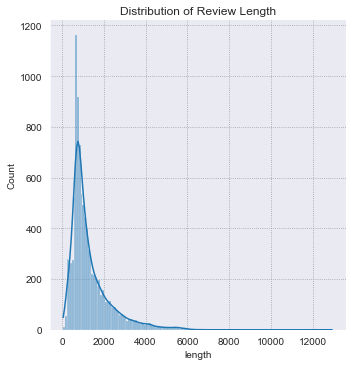

In [17]:
sns.displot(df1,x ="length",kde = True,)
plt.title("Distribution of Review Length")

In [18]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
length,10000.0,1311.1575,979.102997,53.0,699.0,973.0,1608.0,12930.0


<AxesSubplot:title={'center':'Descriptive Stats of Dataframe'}>

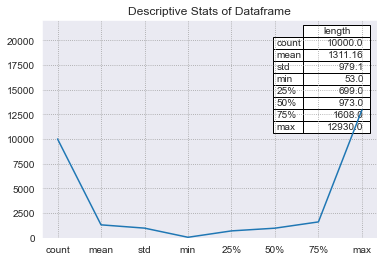

<Figure size 2000x2000 with 0 Axes>

In [19]:
from pandas.plotting import table
from matplotlib.pyplot import figure
fig,ax = plt.subplots(1,1)
ax.set_ylim([0,22000])
plt.title("Descriptive Stats of Dataframe")
figure(figsize = (20,20),dpi = 100)
table(ax,np.round(df1.describe(),2),loc = "upper right",colWidths = [0.2,0.2,0.2])
df1.describe().plot(ax=ax,legend = None)

In [20]:
print("The number of unique keywords in our data :",df1['review'].nunique())

The number of unique keywords in our data : 9986


In [21]:
import re

In [22]:
df1["spec_char"] = df1["review"].map(lambda x: len(re.findall(r"[\W_]", re.sub(r"\s", "", x))))

In [23]:
df1["spec_char"].value_counts()

22     218
27     193
20     182
23     179
24     178
      ... 
211      1
330      1
298      1
282      1
591      1
Name: spec_char, Length: 276, dtype: int64

In [24]:
def convert_abbrev(word):
    return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word

In [25]:
def convert_abbrev_in_text(text):
    tokens = word_tokenize(text)
    tokens = [convert_abbrev(word) for word in tokens]
    text = ' '.join(tokens)
    return text

In [26]:
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk",
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart",
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "ig" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet",
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously",
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [27]:
lemma = WordNetLemmatizer()

In [28]:
def data_cleanse(review):
    # Lower casing
    review = review.lower()

    # getting rid of mentions
    review = re.sub(r"@\S+", " ", review)

    # removing html
    review = re.sub(r"&.*?;|<.*?>", " ", review)

    # url removal
    review = re.sub(r"https?://\S+|www\.\S+", " ", review)

    # handling abbreviations
    review = convert_abbrev_in_text(review)

    # non word removals (special chars)
    review = re.sub(r"[^a-z]", " ", review)

    # Stop word removal
    review = " ".join(word for word in word_tokenize(review) if word not in stopwords.words('english'))

    # lemmatization
    review = " ".join(lemma.lemmatize(word) for word in word_tokenize(review))

    # Single char removal
    review = re.sub(r"\b\w\b", "", review).strip()

    return review

In [30]:
df1["Cleaned_review"] =df1["review"].apply(data_cleanse)

In [31]:
df1["Cleaned_Words"] = df1["Cleaned_review"].apply(lambda x: len(re.sub(r"[\W_]", " ", x).split()))

In [32]:
df1

,review,sentiment,length,spec_char,Cleaned_review,Cleaned_Words
10835,i really did not watch this show as often when...,positive,3745,77,really watch show often child first episode re...,350
45390,>>>>Author: msgreen-1 from Canada >>>>The big ...,positive,1121,192,author msgreen canada big problem china syndro...,89
49338,What's to like about this movie???<br /><br />...,negative,2211,169,like movie colour impressive underwater photog...,172
21101,The opening scenes move as fluidly as frozen v...,negative,810,17,opening scene move fluidly frozen velveeta att...,73
46652,Anastasia: The Mystery of Anna was a two-part ...,positive,1212,43,anastasia mystery anna two part star studded h...,120
...,...,...,...,...,...,...
32771,Black and White film. Good photography. Believ...,negative,678,28,black white film good photography believable c...,55
222,Howard (Kevin Kline) teaches English at the hi...,positive,1755,74,howard kevin kline teach english high school s...,158
12102,"This was a romantic, simple funny movie. I rea...",positive,755,22,romantic simple funny movie really enjoyed wou...,71
12890,This movie is so daring it doesn't attempt to ...,negative,1851,59,movie daring attempt hide similarity shining ...,164


In [33]:
print("The number of duplicates in data :",df1['Cleaned_review'].duplicated().sum())

The number of duplicates in data : 14


In [34]:
df1=df1.drop_duplicates(subset="Cleaned_review", keep="first").reset_index(drop=True) #dropping duplicates

In [35]:
df1

,review,sentiment,length,spec_char,Cleaned_review,Cleaned_Words
0,i really did not watch this show as often when...,positive,3745,77,really watch show often child first episode re...,350
1,>>>>Author: msgreen-1 from Canada >>>>The big ...,positive,1121,192,author msgreen canada big problem china syndro...,89
2,What's to like about this movie???<br /><br />...,negative,2211,169,like movie colour impressive underwater photog...,172
3,The opening scenes move as fluidly as frozen v...,negative,810,17,opening scene move fluidly frozen velveeta att...,73
4,Anastasia: The Mystery of Anna was a two-part ...,positive,1212,43,anastasia mystery anna two part star studded h...,120
...,...,...,...,...,...,...
9981,Black and White film. Good photography. Believ...,negative,678,28,black white film good photography believable c...,55
9982,Howard (Kevin Kline) teaches English at the hi...,positive,1755,74,howard kevin kline teach english high school s...,158
9983,"This was a romantic, simple funny movie. I rea...",positive,755,22,romantic simple funny movie really enjoyed wou...,71
9984,This movie is so daring it doesn't attempt to ...,negative,1851,59,movie daring attempt hide similarity shining ...,164


In [36]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dhruv\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [37]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [38]:
sia = SentimentIntensityAnalyzer()

In [39]:
sia.polarity_scores("The film was awesome")

{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}

In [40]:
df1["polarity_score"] = df1["Cleaned_review"].apply(lambda x: sia.polarity_scores(x)["compound"])

In [41]:
df1

,review,sentiment,length,spec_char,Cleaned_review,Cleaned_Words,polarity_score
0,i really did not watch this show as often when...,positive,3745,77,really watch show often child first episode re...,350,0.9956
1,>>>>Author: msgreen-1 from Canada >>>>The big ...,positive,1121,192,author msgreen canada big problem china syndro...,89,-0.0516
2,What's to like about this movie???<br /><br />...,negative,2211,169,like movie colour impressive underwater photog...,172,0.9432
3,The opening scenes move as fluidly as frozen v...,negative,810,17,opening scene move fluidly frozen velveeta att...,73,0.4767
4,Anastasia: The Mystery of Anna was a two-part ...,positive,1212,43,anastasia mystery anna two part star studded h...,120,0.9684
...,...,...,...,...,...,...,...
9981,Black and White film. Good photography. Believ...,negative,678,28,black white film good photography believable c...,55,0.7488
9982,Howard (Kevin Kline) teaches English at the hi...,positive,1755,74,howard kevin kline teach english high school s...,158,0.9978
9983,"This was a romantic, simple funny movie. I rea...",positive,755,22,romantic simple funny movie really enjoyed wou...,71,0.9946
9984,This movie is so daring it doesn't attempt to ...,negative,1851,59,movie daring attempt hide similarity shining ...,164,-0.9322


In [42]:
df1["sentiment_label"] = df1["Cleaned_review"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

In [43]:
df1

,review,sentiment,length,spec_char,Cleaned_review,Cleaned_Words,polarity_score,sentiment_label
0,i really did not watch this show as often when...,positive,3745,77,really watch show often child first episode re...,350,0.9956,pos
1,>>>>Author: msgreen-1 from Canada >>>>The big ...,positive,1121,192,author msgreen canada big problem china syndro...,89,-0.0516,neg
2,What's to like about this movie???<br /><br />...,negative,2211,169,like movie colour impressive underwater photog...,172,0.9432,pos
3,The opening scenes move as fluidly as frozen v...,negative,810,17,opening scene move fluidly frozen velveeta att...,73,0.4767,pos
4,Anastasia: The Mystery of Anna was a two-part ...,positive,1212,43,anastasia mystery anna two part star studded h...,120,0.9684,pos
...,...,...,...,...,...,...,...,...
9981,Black and White film. Good photography. Believ...,negative,678,28,black white film good photography believable c...,55,0.7488,pos
9982,Howard (Kevin Kline) teaches English at the hi...,positive,1755,74,howard kevin kline teach english high school s...,158,0.9978,pos
9983,"This was a romantic, simple funny movie. I rea...",positive,755,22,romantic simple funny movie really enjoyed wou...,71,0.9946,pos
9984,This movie is so daring it doesn't attempt to ...,negative,1851,59,movie daring attempt hide similarity shining ...,164,-0.9322,neg


In [44]:
df1.drop(['sentiment'],axis=1)

,review,length,spec_char,Cleaned_review,Cleaned_Words,polarity_score,sentiment_label
0,i really did not watch this show as often when...,3745,77,really watch show often child first episode re...,350,0.9956,pos
1,>>>>Author: msgreen-1 from Canada >>>>The big ...,1121,192,author msgreen canada big problem china syndro...,89,-0.0516,neg
2,What's to like about this movie???<br /><br />...,2211,169,like movie colour impressive underwater photog...,172,0.9432,pos
3,The opening scenes move as fluidly as frozen v...,810,17,opening scene move fluidly frozen velveeta att...,73,0.4767,pos
4,Anastasia: The Mystery of Anna was a two-part ...,1212,43,anastasia mystery anna two part star studded h...,120,0.9684,pos
...,...,...,...,...,...,...,...
9981,Black and White film. Good photography. Believ...,678,28,black white film good photography believable c...,55,0.7488,pos
9982,Howard (Kevin Kline) teaches English at the hi...,1755,74,howard kevin kline teach english high school s...,158,0.9978,pos
9983,"This was a romantic, simple funny movie. I rea...",755,22,romantic simple funny movie really enjoyed wou...,71,0.9946,pos
9984,This movie is so daring it doesn't attempt to ...,1851,59,movie daring attempt hide similarity shining ...,164,-0.9322,neg


In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
df1["sentiment_label"] = LabelEncoder().fit_transform(df1["sentiment_label"])

In [47]:
df1

,review,sentiment,length,spec_char,Cleaned_review,Cleaned_Words,polarity_score,sentiment_label
0,i really did not watch this show as often when...,positive,3745,77,really watch show often child first episode re...,350,0.9956,1
1,>>>>Author: msgreen-1 from Canada >>>>The big ...,positive,1121,192,author msgreen canada big problem china syndro...,89,-0.0516,0
2,What's to like about this movie???<br /><br />...,negative,2211,169,like movie colour impressive underwater photog...,172,0.9432,1
3,The opening scenes move as fluidly as frozen v...,negative,810,17,opening scene move fluidly frozen velveeta att...,73,0.4767,1
4,Anastasia: The Mystery of Anna was a two-part ...,positive,1212,43,anastasia mystery anna two part star studded h...,120,0.9684,1
...,...,...,...,...,...,...,...,...
9981,Black and White film. Good photography. Believ...,negative,678,28,black white film good photography believable c...,55,0.7488,1
9982,Howard (Kevin Kline) teaches English at the hi...,positive,1755,74,howard kevin kline teach english high school s...,158,0.9978,1
9983,"This was a romantic, simple funny movie. I rea...",positive,755,22,romantic simple funny movie really enjoyed wou...,71,0.9946,1
9984,This movie is so daring it doesn't attempt to ...,negative,1851,59,movie daring attempt hide similarity shining ...,164,-0.9322,0


In [48]:
y = df1["sentiment_label"]
x = df1["Cleaned_review"]

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(x)

In [51]:
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB


## Multinomial naive bayes

In [53]:
nb_model = MultinomialNB().fit(X, y)
nb_score = cross_val_score(nb_model,
                X,
                y,
                scoring="f1",
                cv=5).mean()
print(nb_score)

0.869645910767195


## Logistic Regression

In [54]:
lr_model = LogisticRegression().fit(X, y)
lr_score = cross_val_score(lr_model,
                X,
                y,
                scoring="f1",
                cv=5).mean()
print(lr_score)

0.9121820689098623


## Support vector machine

In [55]:
svc_model = SVC().fit(X, y)
svc_score = cross_val_score(svc_model,
                X,
                y, scoring = "f1",
                cv=5, n_jobs=-1).mean()
print(svc_score)

0.8863791517796086


## Decision Trees

In [56]:
dc_model = DecisionTreeClassifier().fit(X, y)
dc_score = cross_val_score(dc_model,
                X,
                y, scoring = "f1",
                cv=5, n_jobs=-1).mean()
print(dc_score)

0.7990124585894667


## Random Forests

In [57]:
rf_model = RandomForestClassifier().fit(X, y)
rf_score = cross_val_score(rf_model,
                X,
                y, scoring = "f1",
                cv=5, n_jobs=-1).mean()
print(rf_score)

0.8562106854202505


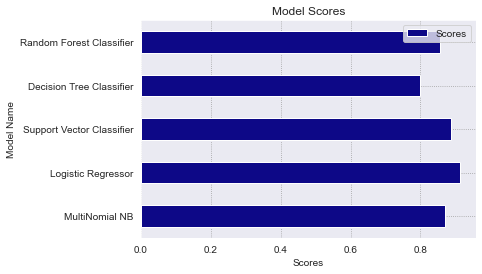

In [58]:
scores = {
    'Model Name' : ["MultiNomial NB", "Logistic Regressor", "Support Vector Classifier", "Decision Tree Classifier", "Random Forest Classifier"],
    'Scores' : [nb_score, lr_score, svc_score, dc_score, rf_score]
}

scores_df = pd.DataFrame(scores)

scores_df.plot(x='Model Name', y='Scores', kind='barh',colormap = 'plasma')

plt.xlabel('Scores')
plt.ylabel('Model Name')
plt.title('Model Scores')

plt.show()

In [59]:
rf_tuned_model = RandomForestClassifier(random_state=42)

In [60]:
rf_params = {"max_depth": [8, None],
             "max_features": [7, "sqrt"],
             "min_samples_split": [2, 5, 8],
             "n_estimators": [100, 200]
             }

rf_best_grid = GridSearchCV(rf_tuned_model,
                            rf_params,
                            cv=5,
                            n_jobs=-1,
                            verbose=1).fit(X, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [61]:
rf_best_grid.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 100}

In [62]:
rf_final = rf_tuned_model.set_params(**rf_best_grid.best_params_, random_state=42).fit(X, y)

In [64]:
cross_val_score(rf_final, X, y, cv=5, n_jobs=-1).mean()

0.7686753854505481

In [65]:
new_review = pd.Series("this film is beautiful")

#vectorize the our review
new_review = CountVectorizer().fit(x).transform(new_review)

# predict the sentiment of our review
svc_model.predict(new_review)

array([1])

## The model that gave me the highest accuracy was Logistic Regression.